<a href="https://colab.research.google.com/github/YesidORC/Proyecto_DL_2024_1/blob/main/03_Arquitectura_Linea_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from google.colab import drive
import pandas as pd

In [ ]:
url="/content/drive"
drive.mount(url)
file_path="/content/drive/MyDrive/Colab Notebooks/Proyecto_Final_DL"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers"
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar ` de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
x_tr=np.load(file_path+"/x_tr.npy")
y_tr=np.load(file_path+"/y_tr.npy")
x_vl=np.load(file_path+"/x_vl.npy")
y_vl=np.load(file_path+"/y_vl.npy")
x_ts=np.load(file_path+"/x_ts.npy")
y_ts=np.load(file_path+"/y_ts.npy")

In [ ]:
data_in = {'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,}
data_s, scaler = escalar_dataset(data_in)

In [ ]:
x_tr_s=np.load(file_path+"/x_tr_s.npy")
y_tr_s=np.load(file_path+"/y_tr_s.npy")
x_vl_s=np.load(file_path+"/x_vl_s.npy")
y_vl_s=np.load(file_path+"/y_vl_s.npy")
x_ts_s=np.load(file_path+"/x_ts_s.npy")
y_ts_s=np.load(file_path+"/y_ts_s.npy")

In [ ]:
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()
INPUT_LENGTH = 24    # Registros de 24 horas consecutivas a la entrada
OUTPUT_LENGTH = 1
N_UNITS = 200
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2])
modelo = Sequential()
modelo.add(LSTM(N_UNITS,return_sequences= True,input_shape=INPUT_SHAPE))
modelo.add(LSTM(N_UNITS))
modelo.add(Dense(OUTPUT_LENGTH))

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(optimizer = optimizador,loss =  root_mean_squared_error,)

In [ ]:
EPOCHS = 100
BATCH_SIZE = 256
model = modelo.fit(x = x_tr_s,y = y_tr_s,batch_size = BATCH_SIZE,epochs = EPOCHS,validation_data = (x_vl_s, y_vl_s),verbose=2)


Epoch 1/100
206/206 - 110s - loss: 0.2508 - val_loss: 0.1456 - 110s/epoch - 535ms/step
Epoch 2/100
206/206 - 107s - loss: 0.1376 - val_loss: 0.1371 - 107s/epoch - 520ms/step
Epoch 3/100
206/206 - 105s - loss: 0.1324 - val_loss: 0.1323 - 105s/epoch - 507ms/step
Epoch 4/100
206/206 - 113s - loss: 0.1273 - val_loss: 0.1263 - 113s/epoch - 548ms/step
Epoch 5/100
206/206 - 107s - loss: 0.1219 - val_loss: 0.1209 - 107s/epoch - 522ms/step
Epoch 6/100
206/206 - 104s - loss: 0.1161 - val_loss: 0.1148 - 104s/epoch - 504ms/step
Epoch 7/100
206/206 - 104s - loss: 0.1100 - val_loss: 0.1098 - 104s/epoch - 507ms/step
Epoch 8/100
206/206 - 107s - loss: 0.1031 - val_loss: 0.1009 - 107s/epoch - 518ms/step
Epoch 9/100
206/206 - 105s - loss: 0.0969 - val_loss: 0.0954 - 105s/epoch - 508ms/step
Epoch 10/100
206/206 - 105s - loss: 0.0920 - val_loss: 0.0916 - 105s/epoch - 508ms/step
Epoch 11/100
206/206 - 108s - loss: 0.0881 - val_loss: 0.0873 - 108s/epoch - 524ms/step
Epoch 12/100
206/206 - 104s - loss: 0.084

In [ ]:
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.055
  RMSE val:	 0.056
  RMSE test:	 0.058


KeyError: 'accuracy'

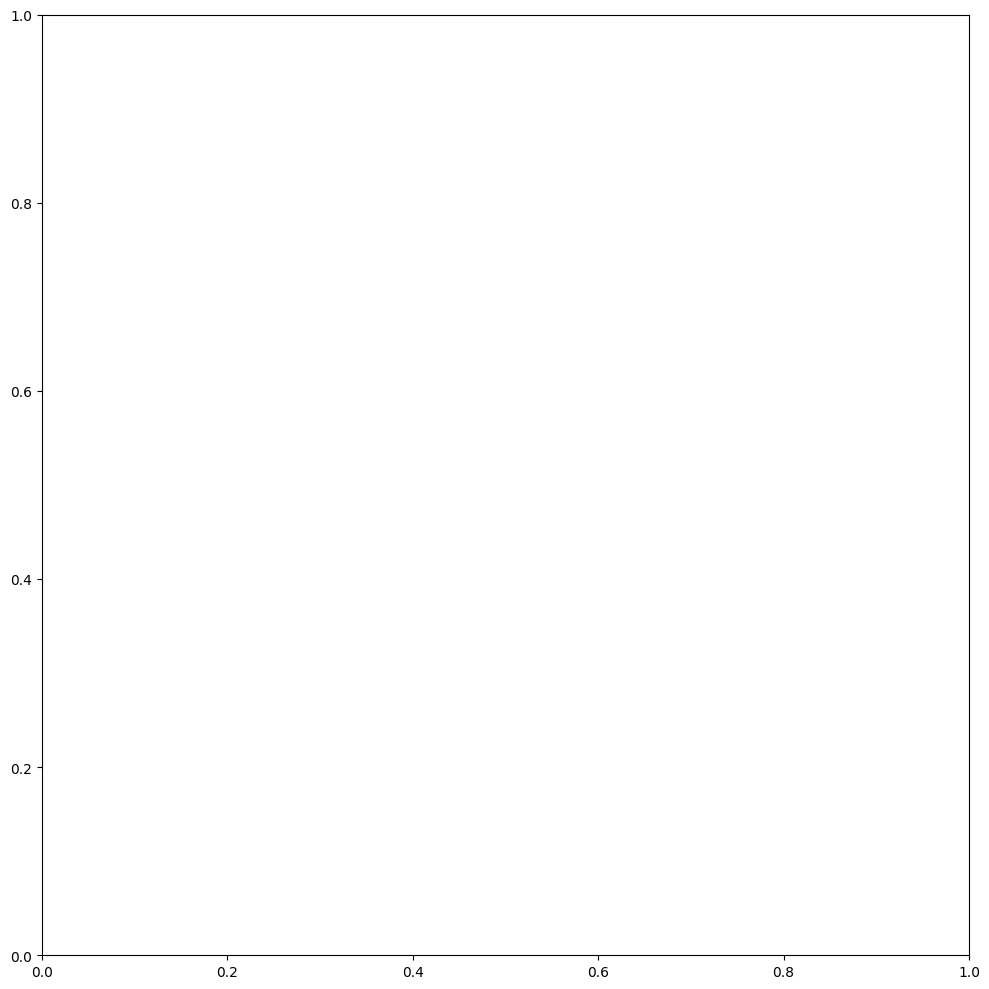

In [ ]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(model.history['accuracy'], model.history['val_accuracy'], 'accuracy', 211)
display_training_curves(model.history['loss'], model.history['val_loss'], 'loss', 212)

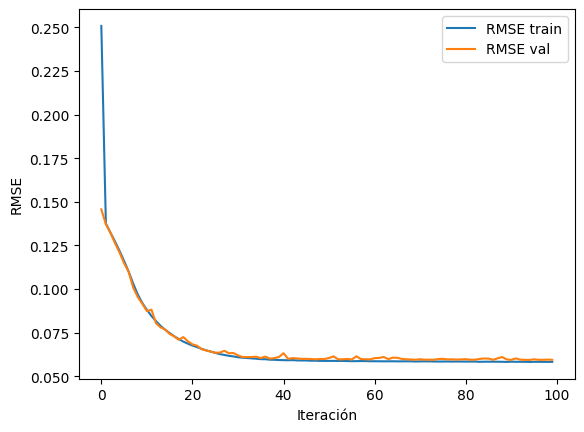

In [ ]:
plt.plot(model.history['loss'],label='RMSE train')
plt.plot(model.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
def predecir(x, model, scaler):
    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

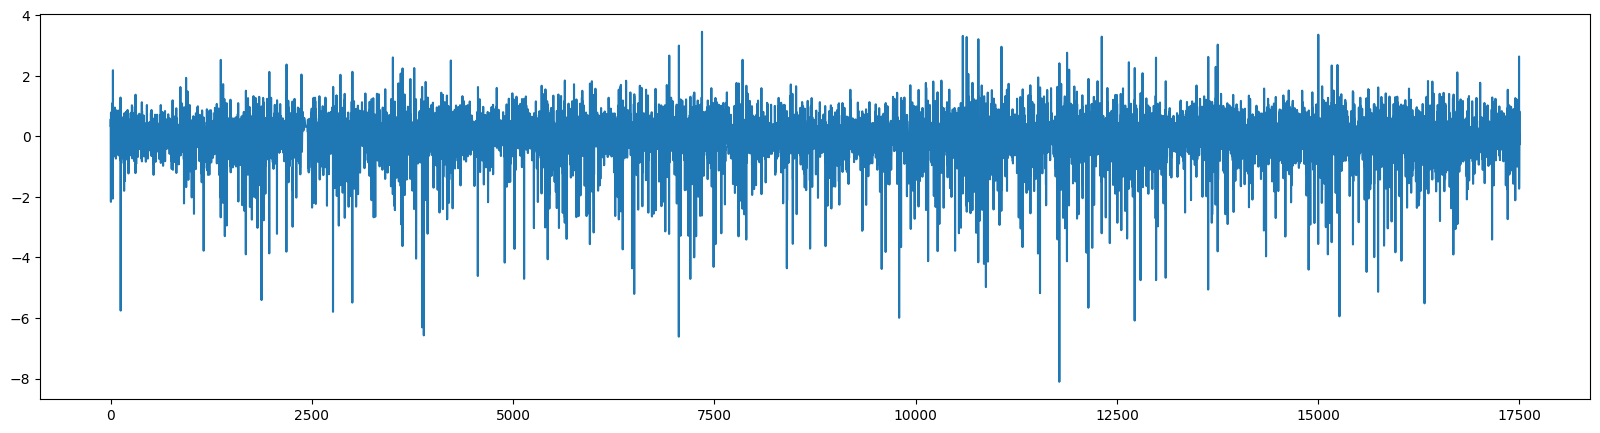

In [ ]:
y_ts_pred = predecir(x_ts_s, modelo, scaler)
N = len(y_ts_pred)    # Número de predicciones (tamaño del set de prueba)
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.figure(figsize=(20,5))
plt.plot(errores);